In [13]:
import sys
sys.path.append('../')

import torchvision
import torchvision.transforms as transforms

from cubical.optimization import GridSearch


# 데이터셋을 위한 변환(transform) 정의
transform = transforms.Compose([
    transforms.ToTensor(),
])

# CIFAR-10 훈련 데이터셋 로드
#train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                             download=True, transform=transform)

train_dataset = torchvision.datasets.SVHN(root='./data', split='train', 
                                          transform=transform, download=True)


100%|██████████| 182040794/182040794 [00:40<00:00, 4523098.86it/s]


In [14]:
import random
import torch

# 1000장의 이미지를 무작위로 샘플링
num_samples = 1000
subset_indices = random.sample(range(len(train_dataset)), num_samples)
subset_dataset = torch.utils.data.Subset(train_dataset, subset_indices)

In [15]:
images_only_dataset = [image for image, _ in subset_dataset]
dataset = torch.stack(images_only_dataset)

INFO:cubical.optimization:Params: (0.0000, 0.0000, 0.0000), Average Entropy: 0.0000
INFO:cubical.optimization:Params: (0.0000, 0.0000, 0.1111), Average Entropy: 2.3013
INFO:cubical.optimization:Params: (0.0000, 0.0000, 0.2222), Average Entropy: 2.4772
INFO:cubical.optimization:Params: (0.0000, 0.0000, 0.3333), Average Entropy: 2.6262
INFO:cubical.optimization:Params: (0.0000, 0.0000, 0.4444), Average Entropy: 2.7567
INFO:cubical.optimization:Params: (0.0000, 0.0000, 0.5556), Average Entropy: 2.8731
INFO:cubical.optimization:Params: (0.0000, 0.0000, 0.6667), Average Entropy: 2.9781
INFO:cubical.optimization:Params: (0.0000, 0.0000, 0.7778), Average Entropy: 3.0737
INFO:cubical.optimization:Params: (0.0000, 0.0000, 0.8889), Average Entropy: 3.1613
INFO:cubical.optimization:Params: (0.0000, 0.0000, 1.0000), Average Entropy: 3.2421
INFO:cubical.optimization:Params: (0.0000, 0.1111, 0.0000), Average Entropy: 2.1586
INFO:cubical.optimization:Params: (0.0000, 0.1111, 0.1111), Average Entropy:

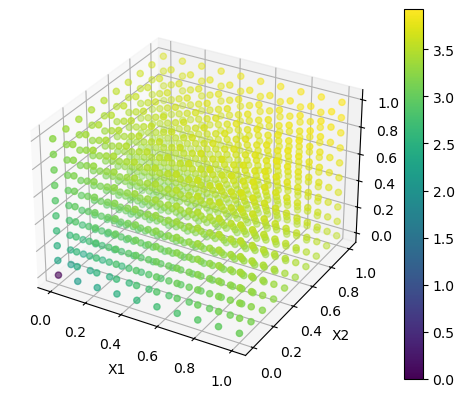

In [16]:
best_params, best_entropy = GridSearch(dataset=dataset, steps=10).optimize()

In [17]:
print('best_parameters = ', best_params)
print('best entropy = ', best_entropy)

best_parameters =  (1.0, 1.0, 1.0)
best entropy =  3.926632435293322


In [18]:
from cubical.converter import GrayscaleConverter

best_converter = GrayscaleConverter(dataset=dataset, x1=best_params[0], x2=best_params[1], x3=best_params[2])
converted_dataset = best_converter.convert_dataset()

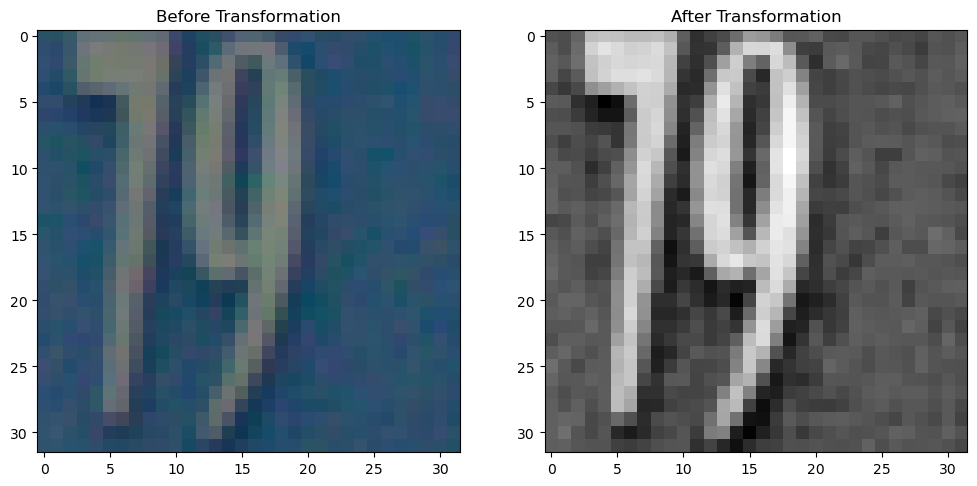

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(before, after):
    # 변환 전 이미지: PyTorch 텐서에서 NumPy 배열로 변환
    before_np = before.numpy()
    before_np = np.transpose(before_np, (1, 2, 0))  # [채널, 높이, 너비] -> [높이, 너비, 채널]

    # 변환 후 이미지: PyTorch 텐서에서 NumPy 배열로 변환
    after_np = after.numpy()
    after_np = np.transpose(after_np, (1, 2, 0))  # [채널, 높이, 너비] -> [높이, 너비, 채널]

    # 이미지 시각화
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(before_np)
    plt.title("Before Transformation")

    plt.subplot(1, 2, 2)
    plt.imshow(after_np.squeeze(), cmap='gray')  # 그레이스케일 이미지는 채널을 제거
    plt.title("After Transformation")

    plt.show()

# 이미지 샘플 가져오기 (예시)
before_sample = dataset[5]
after_sample = converted_dataset[5]

# 시각화 함수 호출
show_images(before_sample, after_sample)